<a href="https://colab.research.google.com/github/StacyMwende/hypothyroidism_prediction/blob/master/Week8_IP_Hypothyroidism_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Defining the Question

### a) Specifying the Question


>Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. Use the healthcare datasets provided to accomplish the following:  

>> Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.



### b) Defining the Metric for Success

> The model should be simple enough and accurate in the predictions for the different patients that exhibit certain symptoms hence making work easier for the hospital to carry out diagnosis.

### d) Recording the Experimental Design

For analysis of the problem in place, i will use CRISP-DM methodology which involves:

a) Business Understanding 

b) Data Understanding

c) Data Preparation

d) Modeling 

e) Evaluation

f) Deployment

### e) Overview

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. Use the healthcare datasets provided to accomplish the following:  

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

Part 1: Decision trees:
- For this section, you should build a model that makes the above prediction. You should not use individual decision trees, rather you should use at least 2 out of the 3 advanced models we have studied: Random forests, Ada boosted trees, and gradient boosted trees.
- Try and optimize each of the 2 models, making sure to document how you've set up your hyperparameters.
- Identify which of the 2 models you trust most, and use your model to determine which features are most impactful in influencing the prediction
- Note that with decision trees, you don't need to do a lot of data cleaning. This will be very different with SVM.

Part 2: SVM:

- In this section, you may be required to clean the data a little bit so as to make sense of the features.

- Document what transformation you've done on the data.

- Apply Polynomial, linear and rbf kernel function to build your SVM model and then evaluate their performance and pick the kernel that performs the best. Remember to tune your parameters to improve the performance of your model. To make your life easier, make sure to visualize the models you've created. Use any two features to build the models for this step.

Hint: You may want to use decision trees to give you the most preferable features you can use. but also keep in mind that those features might not be suitable for SVM. It might be a good idea to graph them first.

-  After getting your best performing kernel, use this kernel together with your tuned parameters and repeat the prediction but this time using additional features. Compare the model you've just created with the 2-features version. 

> Dataset

Source [http://bit.ly/hypothyroid_data]

### f) Hypothyroidism Understanding

> Hypothyridism occurs when your body doesn't produce enough thyroid hormone. The thyroid gland produces hormones to help the body regulate and use energy
 

## 2. Reading the Data

In [0]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import math
from scipy import stats
pd.set_option('display.float_format', lambda x: '%.3f' % x) #Suppress scientific notation

# Visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline 
# Graphics in retina format are more sharp and legible
import seaborn as sns

# One label encoding library
from sklearn import preprocessing 

# Modelling library
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, r2_score,mean_absolute_error, mean_squared_error
import scipy.stats as stats
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")

In [0]:
# Importing the dataset
# 
df = pd.read_csv("hypothyroid.csv",na_values=['?'])
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72.000,M,f,f,f,f,f,f,f,f,f,f,f,y,30.000,y,0.600,y,15.000,y,1.480,y,10.000,n,nan
1,hypothyroid,15.000,F,t,f,f,f,f,f,f,f,f,f,f,y,145.000,y,1.700,y,19.000,y,1.130,y,17.000,n,nan
2,hypothyroid,24.000,M,f,f,f,f,f,f,f,f,f,f,f,y,0.000,y,0.200,y,4.000,y,1.000,y,0.000,n,nan
3,hypothyroid,24.000,F,f,f,f,f,f,f,f,f,f,f,f,y,430.000,y,0.400,y,6.000,y,1.040,y,6.000,n,nan
4,hypothyroid,77.000,M,f,f,f,f,f,f,f,f,f,f,f,y,7.300,y,1.200,y,57.000,y,1.280,y,44.000,n,nan


> Provided dataset had question marks(?) as part of the dataset which i converted to NaN values by passing the na_values() code

**Column description**
> Thyroxine - a drug used to treat hypothyroidism

> antithyroid_medication - type of medication that gradually reduces symptoms of hyperthyroidism. (Should not include this column since we 
 are dealing with hypothyroidism)

> thyroid surgery - is an operatio that involves surgical removal of all or part of the thyroid gland.

> T4 - Thyroxine

> T4 - Triiodothyronine

> TSH - Thyroid Stimulating Hormone test

> TT4 - total T4/total thyroxine

> T4U - Thyroxine utilization rates

> FTI - Free Thyroxine Index

> TBG - Thyroid Binding Globulin 


## 3. Checking the Data

In [0]:
# Determining the no. of records in our dataset
#
print('Number of records in hypothyroid data: ' + str(df.shape))

Number of records in hypothyroid data: (3163, 26)


In [0]:
# Getting datatypes for the different features
df.dtypes
# all the features have the same datatype.

status                        object
age                          float64
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
thyroid_surgery               object
query_hypothyroid             object
query_hyperthyroid            object
pregnant                      object
sick                          object
tumor                         object
lithium                       object
goitre                        object
TSH_measured                  object
TSH                          float64
T3_measured                   object
T3                           float64
TT4_measured                  object
TT4                          float64
T4U_measured                  object
T4U                          float64
FTI_measured                  object
FTI                          float64
TBG_measured                  object
TBG                          float64
dtype: object

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

> From the column description above, the data provided for analysis was in line with the problem statement making it possible to answer the question inplace

In [0]:
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72.000,M,f,f,f,f,f,f,f,f,f,f,f,y,30.000,y,0.600,y,15.000,y,1.480,y,10.000,n,nan
1,hypothyroid,15.000,F,t,f,f,f,f,f,f,f,f,f,f,y,145.000,y,1.700,y,19.000,y,1.130,y,17.000,n,nan
2,hypothyroid,24.000,M,f,f,f,f,f,f,f,f,f,f,f,y,0.000,y,0.200,y,4.000,y,1.000,y,0.000,n,nan
3,hypothyroid,24.000,F,f,f,f,f,f,f,f,f,f,f,f,y,430.000,y,0.400,y,6.000,y,1.040,y,6.000,n,nan
4,hypothyroid,77.000,M,f,f,f,f,f,f,f,f,f,f,f,y,7.300,y,1.200,y,57.000,y,1.280,y,44.000,n,nan


## 5. Tidying the Dataset

In [0]:
# Changing categorical columns to numerical data to be able to do analysis
# 
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['status'] = encoder.fit_transform(df['status'])
df['sex'] = df['sex'].replace({'M':0, 'F':1})
hyp_df = df.replace(to_replace={'f':0,'t':1, 'y':1, 'n':0})
hyp_df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,0,72.000,0.000,0,0,0,0,0,0,0,0,0,0,0,1,30.000,1,0.600,1,15.000,1,1.480,1,10.000,0,nan
1,0,15.000,1.000,1,0,0,0,0,0,0,0,0,0,0,1,145.000,1,1.700,1,19.000,1,1.130,1,17.000,0,nan
2,0,24.000,0.000,0,0,0,0,0,0,0,0,0,0,0,1,0.000,1,0.200,1,4.000,1,1.000,1,0.000,0,nan
3,0,24.000,1.000,0,0,0,0,0,0,0,0,0,0,0,1,430.000,1,0.400,1,6.000,1,1.040,1,6.000,0,nan
4,0,77.000,0.000,0,0,0,0,0,0,0,0,0,0,0,1,7.300,1,1.200,1,57.000,1,1.280,1,44.000,0,nan


In [0]:
# Checking for Anomalies
# 
#involves looking for duplicates in the dataset
print(hyp_df.duplicated().any())
# 
# Printing the number of duplicates
print(hyp_df.duplicated().sum())
# This is an indication that there are duplicates in the dataset

True
77


In [0]:
# removing duplicates

hyp_df.drop_duplicates(keep='first', inplace = True)

print(hyp_df.duplicated().any())

# Duplicates have been removed

False


In [0]:
# checking for null values
# 
hyp_df.isnull().sum()

status                          0
age                           438
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           455
T3_measured                     0
T3                            680
TT4_measured                    0
TT4                           240
T4U_measured                    0
T4U                           239
FTI_measured                    0
FTI                           238
TBG_measured                    0
TBG                          2835
dtype: int64

> There are many missing values in the different columns and dropping them would affect analysis hence we will not drop the missing data.

**Replacing the missing data with appropriate data**

In [0]:
# replacing the data
# 
hyp_df['age'].fillna(hyp_df['age'].mean(), inplace = True)
hyp_df['sex'].fillna(0, inplace = True)
hyp_df['TSH'].fillna(hyp_df['TSH'].mean(), inplace = True)
hyp_df['T3'].fillna(hyp_df['T3'].median(), inplace = True)
hyp_df['TT4'].fillna(hyp_df['TT4'].median(), inplace = True)
hyp_df['T4U'].fillna(hyp_df['T4U'].mean(), inplace = True)
hyp_df['FTI'].fillna(hyp_df['FTI'].median(), inplace = True)
hyp_df['TBG'].fillna(hyp_df['TBG'].mean(), inplace = True)

In [0]:
# confirmation to find any missing data
# 
hyp_df.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

> There is missing data from the above analysis.

## 6. Exploratory Analysis

## a) Univariate Analysis

1    2945
0     141
Name: status, dtype: int64


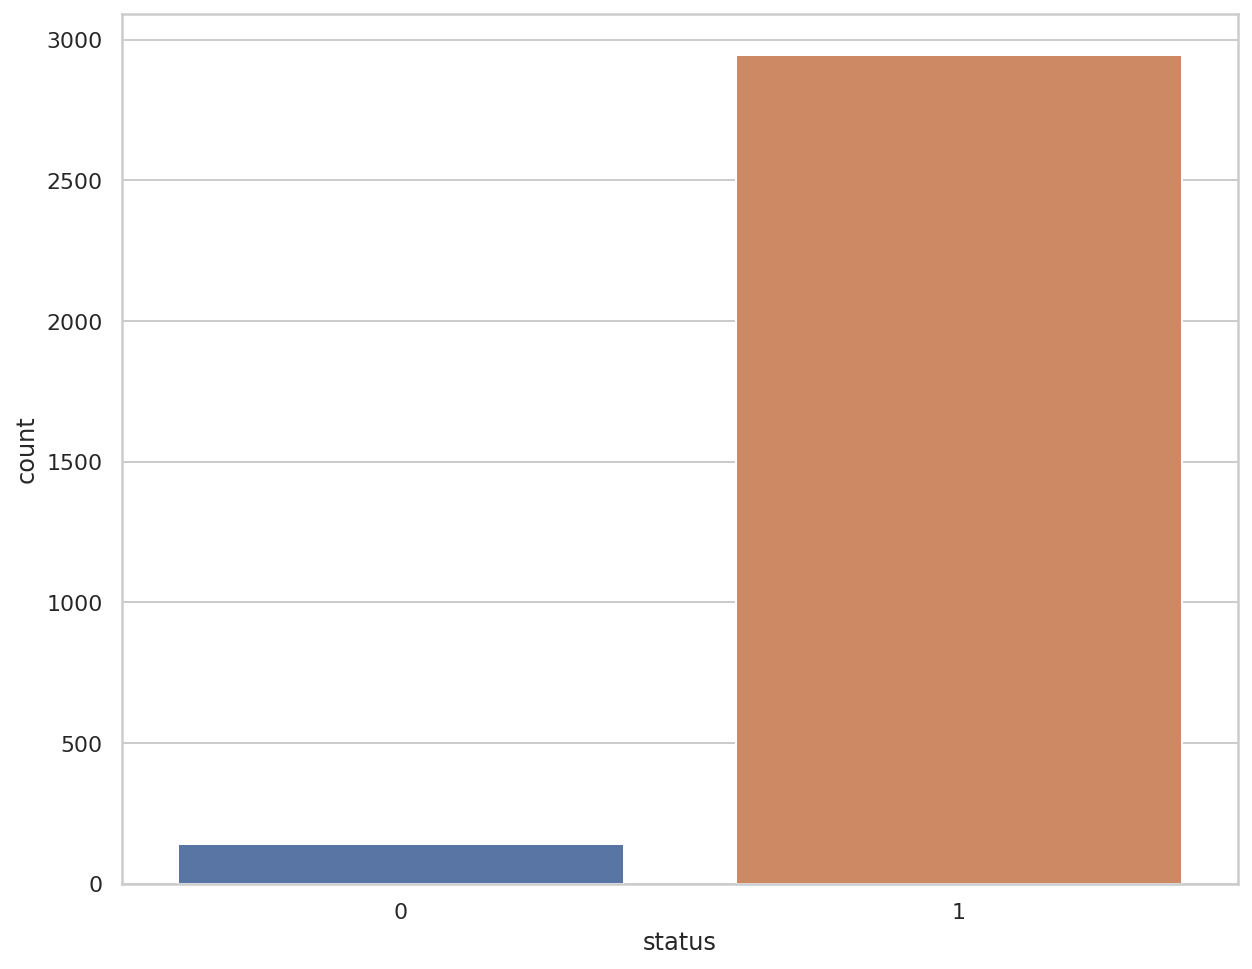

In [0]:
# Ploting the univariate summaries and recording our observations
# our target variable is status, i.e if the patient tested for hypothyroid or not 

print(hyp_df['status'].value_counts())
sns.set_style("whitegrid")
sns.countplot(x='status', data=hyp_df)

> From the analysis abaove, it is clearly shown that most patients tested negative for the hypothyroid disease with only afew testing positive.

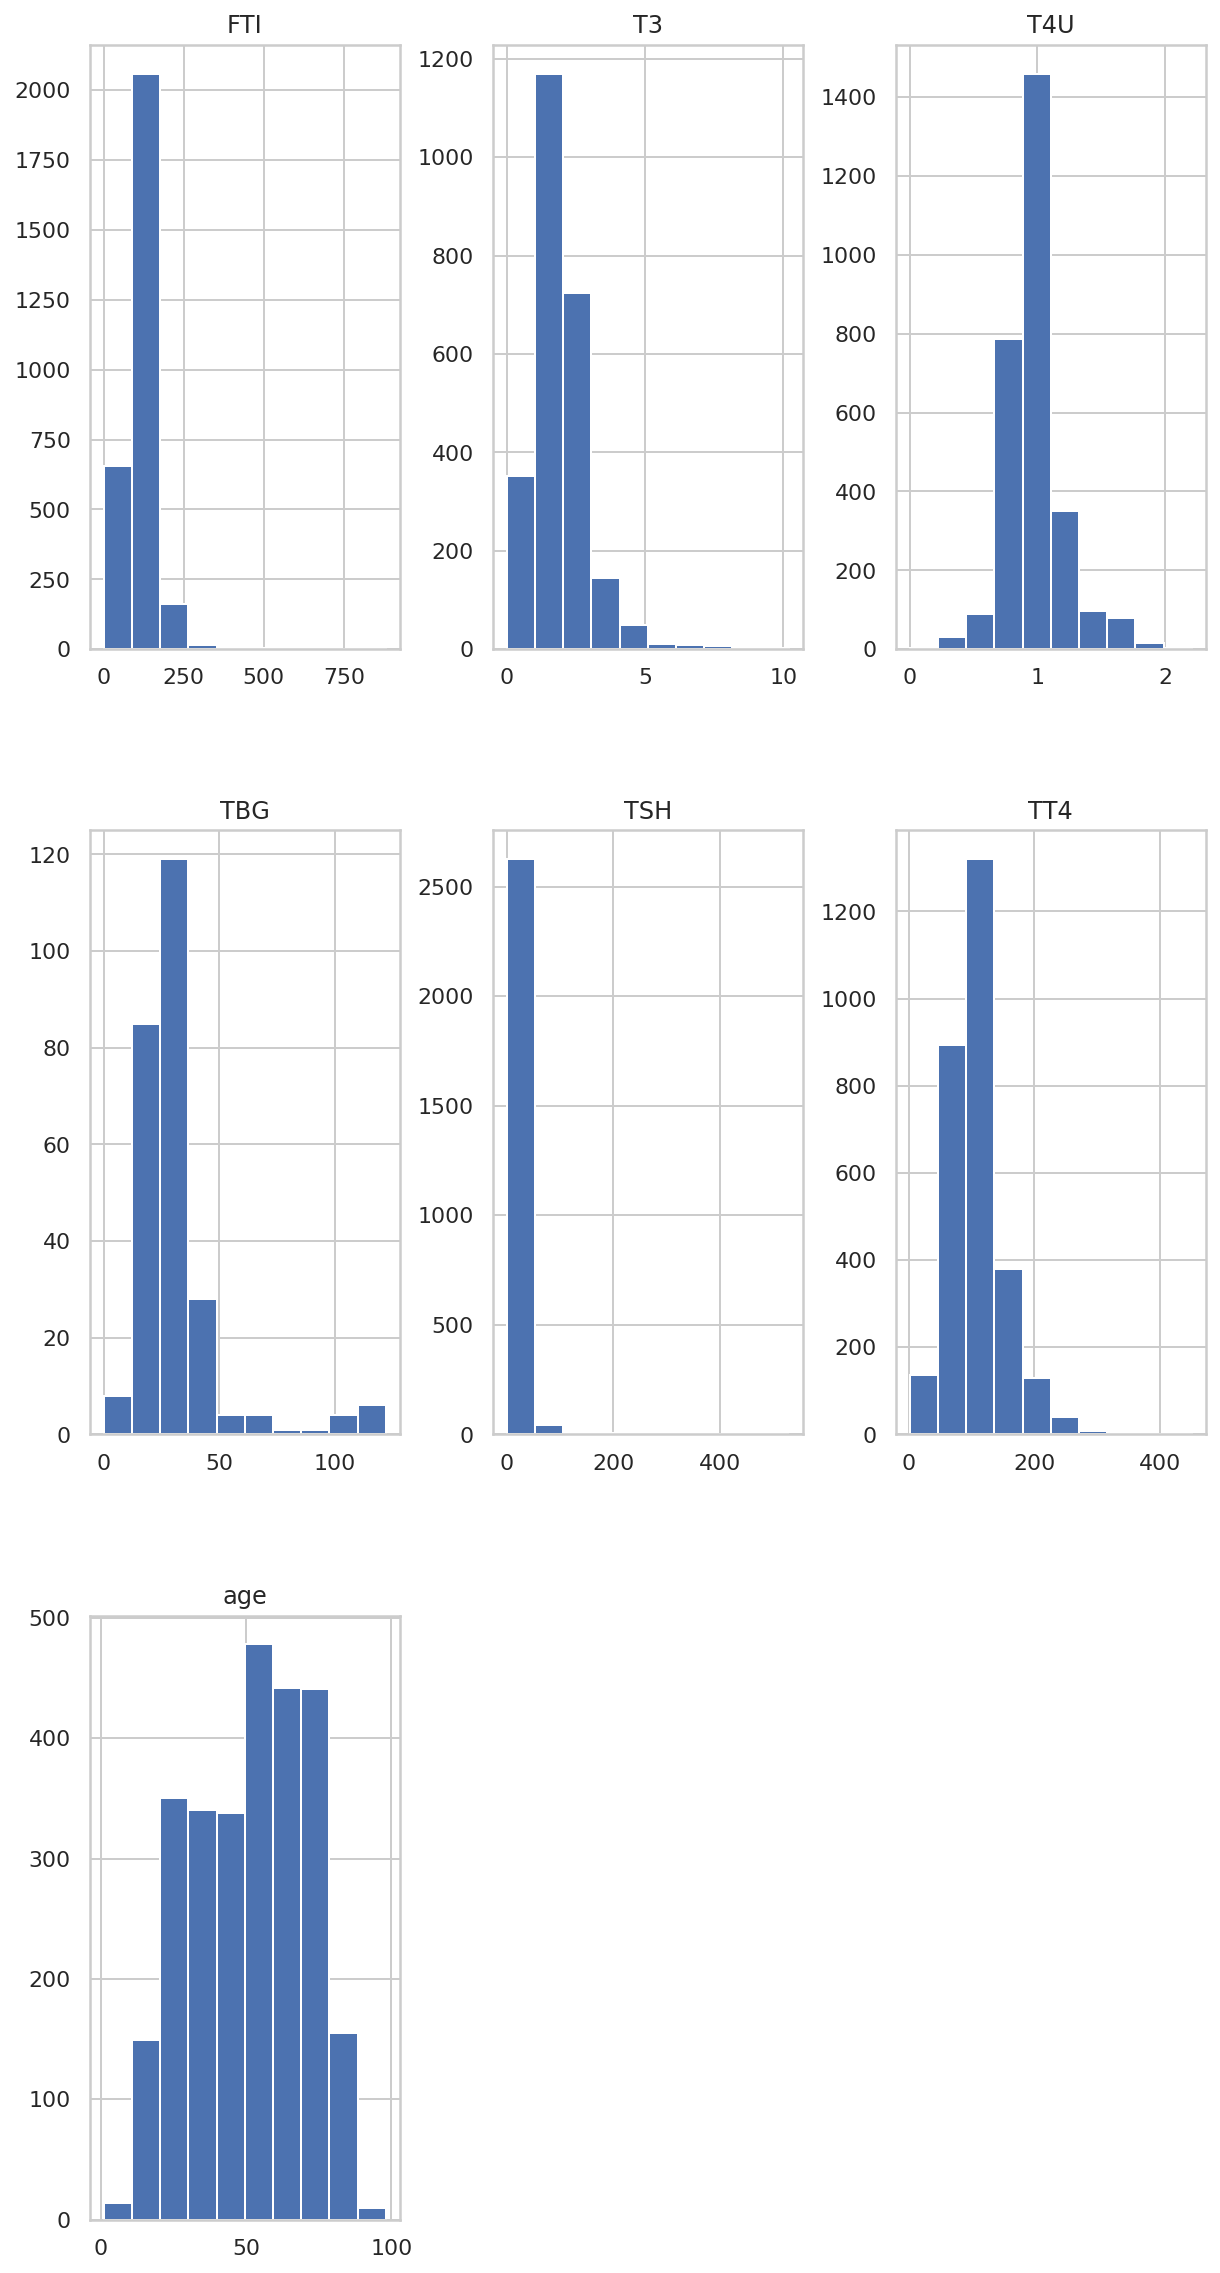

In [0]:
# plotting Histograms for each of the variables to see the distribution

from matplotlib import pyplot
colms = ['age','TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']
df.hist(figsize=(10,20))
pyplot.show()

> From the visualizations above, FTI(Free Thyroxine Index) is left skewed. 
>> A low FTI indicates primary hypothyroidism due to disease in the thyroid gland

>T3,TSH,TBG, and TT4 also show that the data is left skewed.

> T4U and Age have a normal distribution as per the visualization above

In [0]:
hyp_df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

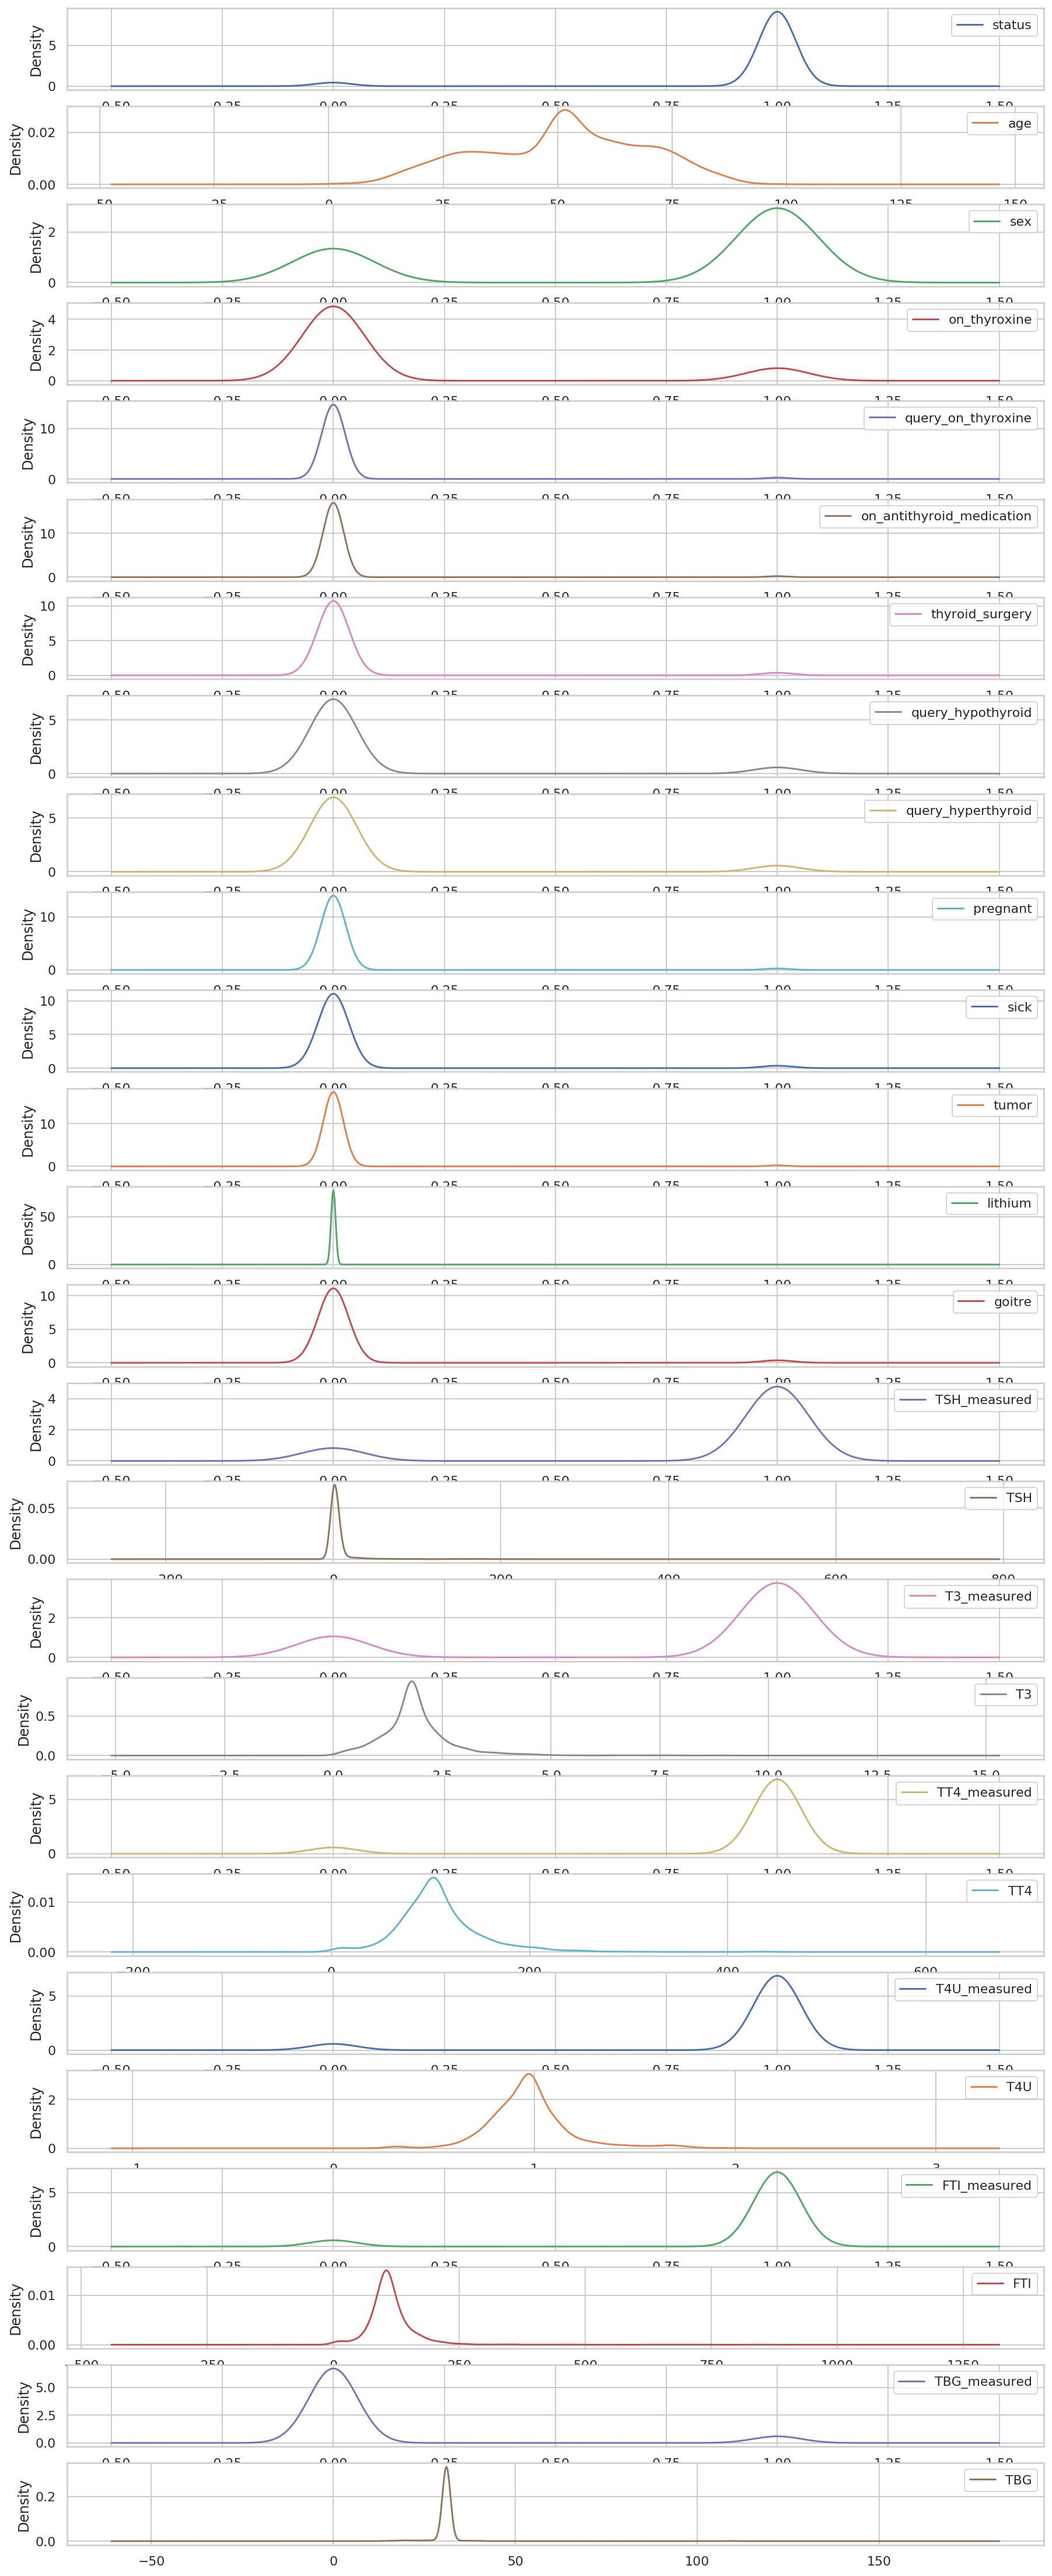

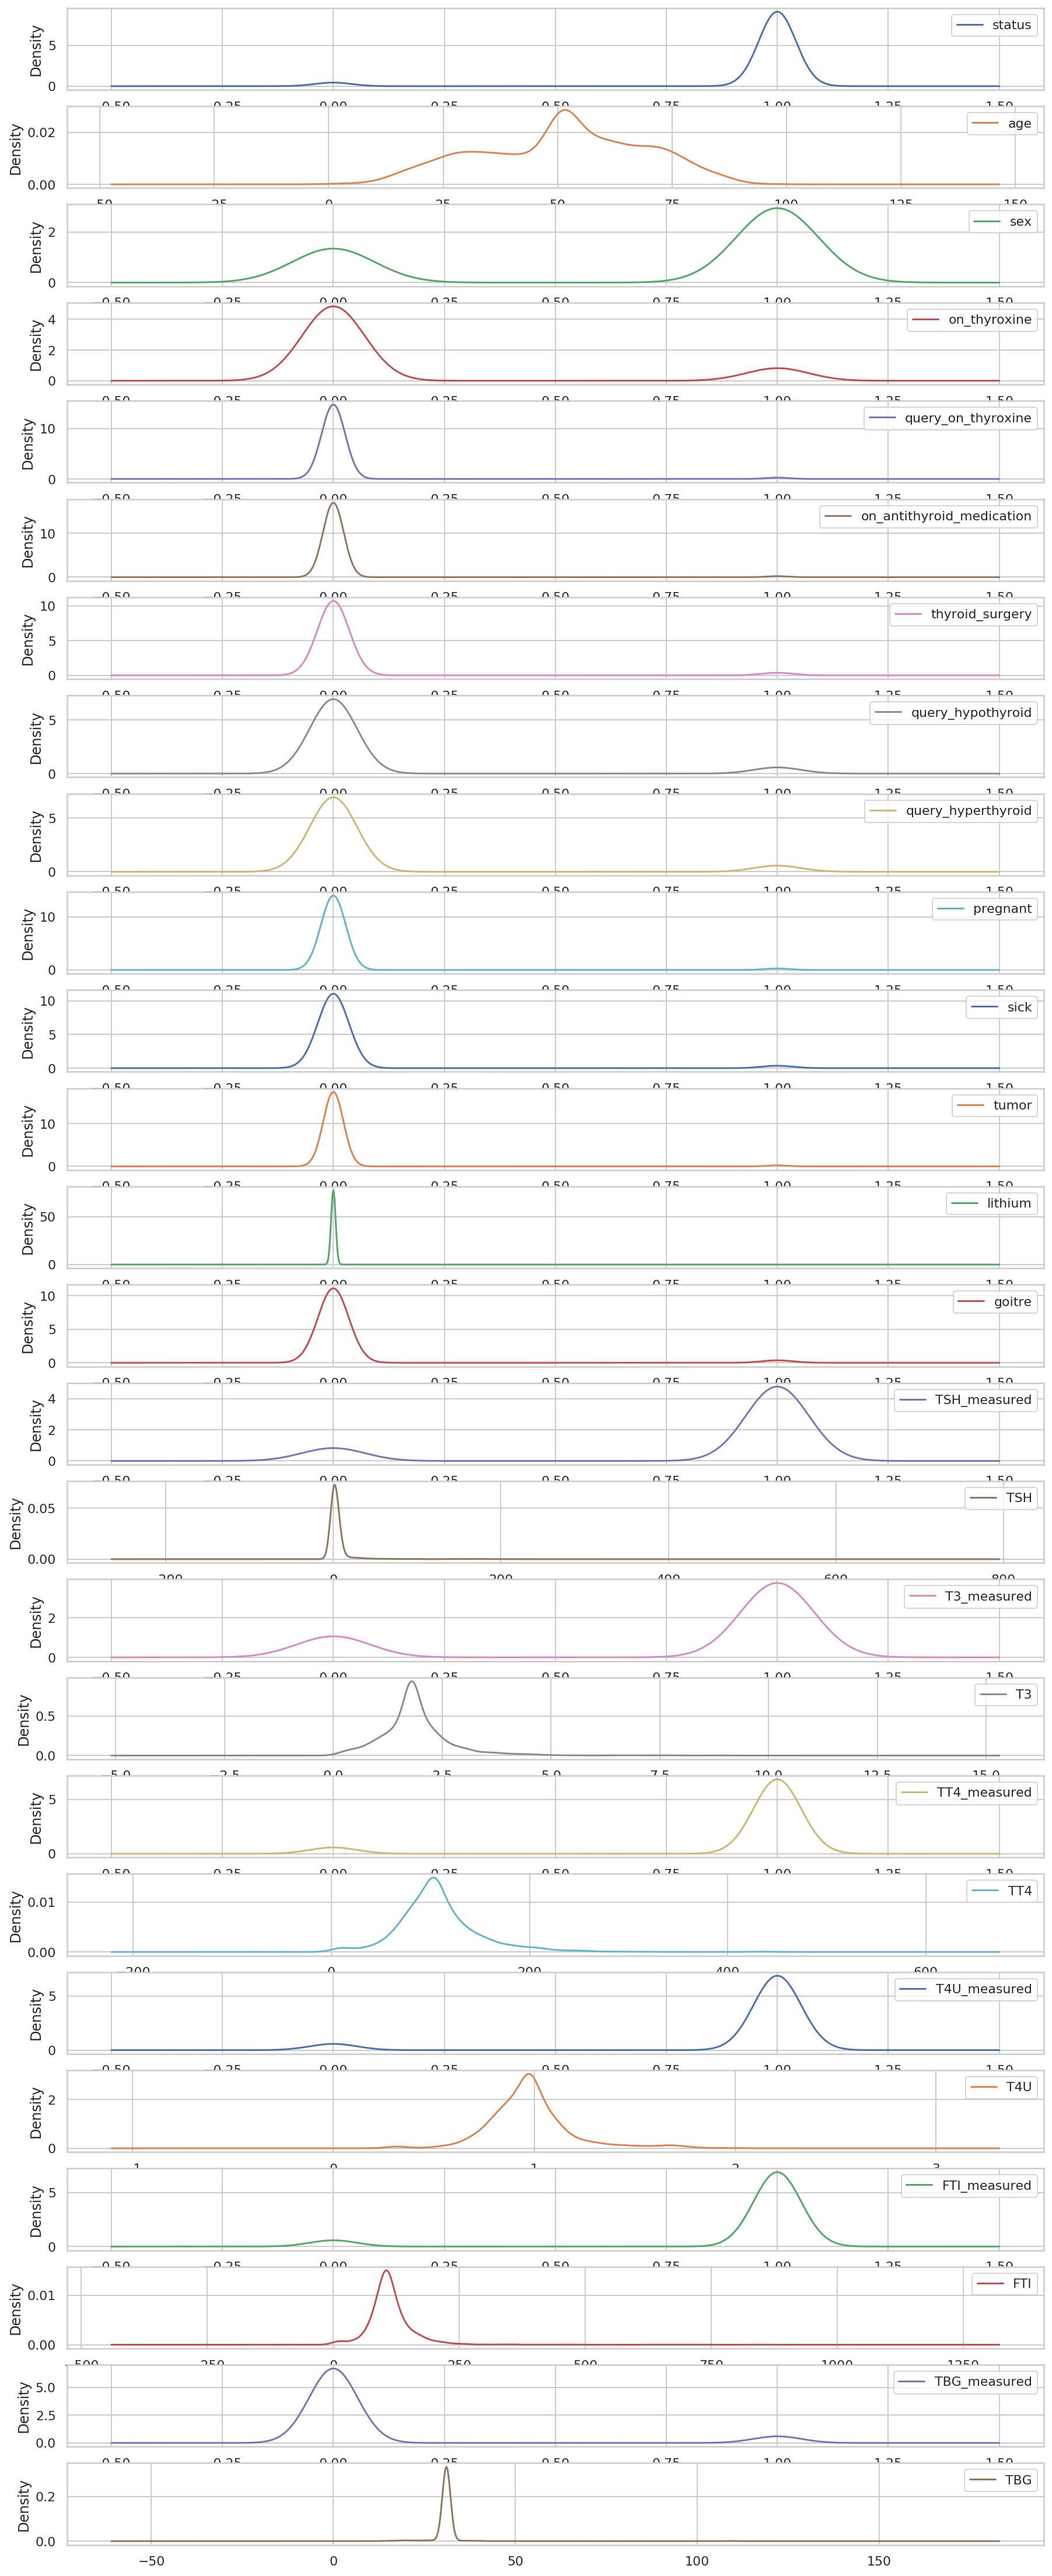

In [0]:
# Density Plots
# Density plots are used to visualize the distribution of data over a period of time

columns = ['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG']
hyp_df.plot(kind= 'density' , subplots=True, sharex=False,figsize=(15,40))
pyplot.show(0)

> A density plot curve is visual where most of the data lies. From the analysis above, most features exhibited a normal disribution based on where most of the dataponts where distributes.

1.000    2119
0.000     967
Name: sex, dtype: int64


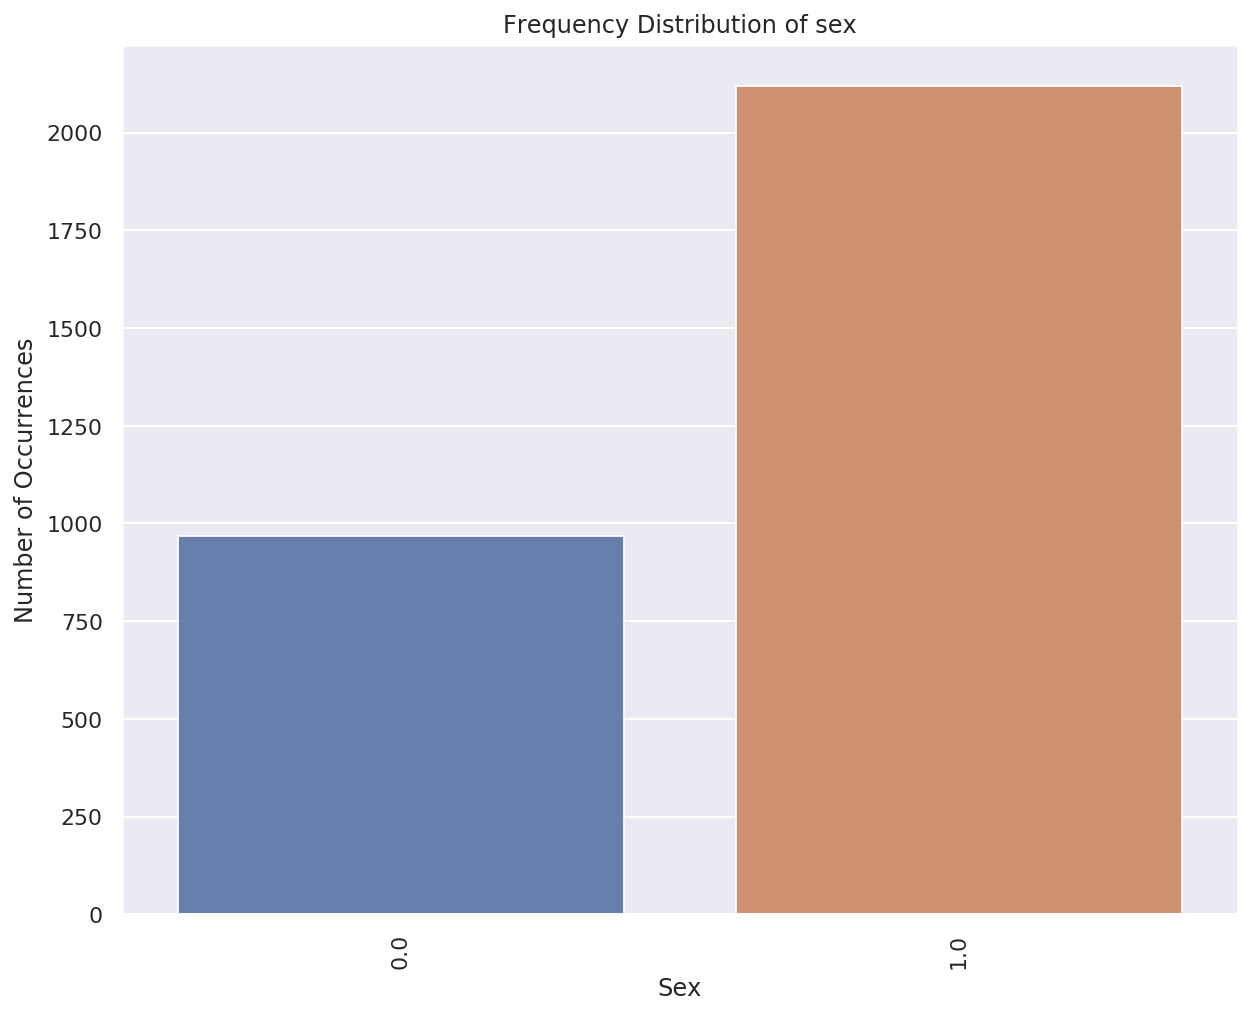

In [0]:
# Frequency distribution of sex column
# 
sex_count = hyp_df['sex'].value_counts()
print(sex_count)
sns.set(style="darkgrid")
sns.barplot(sex_count.index,sex_count.values, alpha=0.9)
plt.title('Frequency Distribution of sex')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Sex', fontsize=12)
plt.xticks(rotation=90)
plt.show()

> The visualization shows that most female patients where in for the survey

1.000    2119
0.000     967
Name: sex, dtype: int64


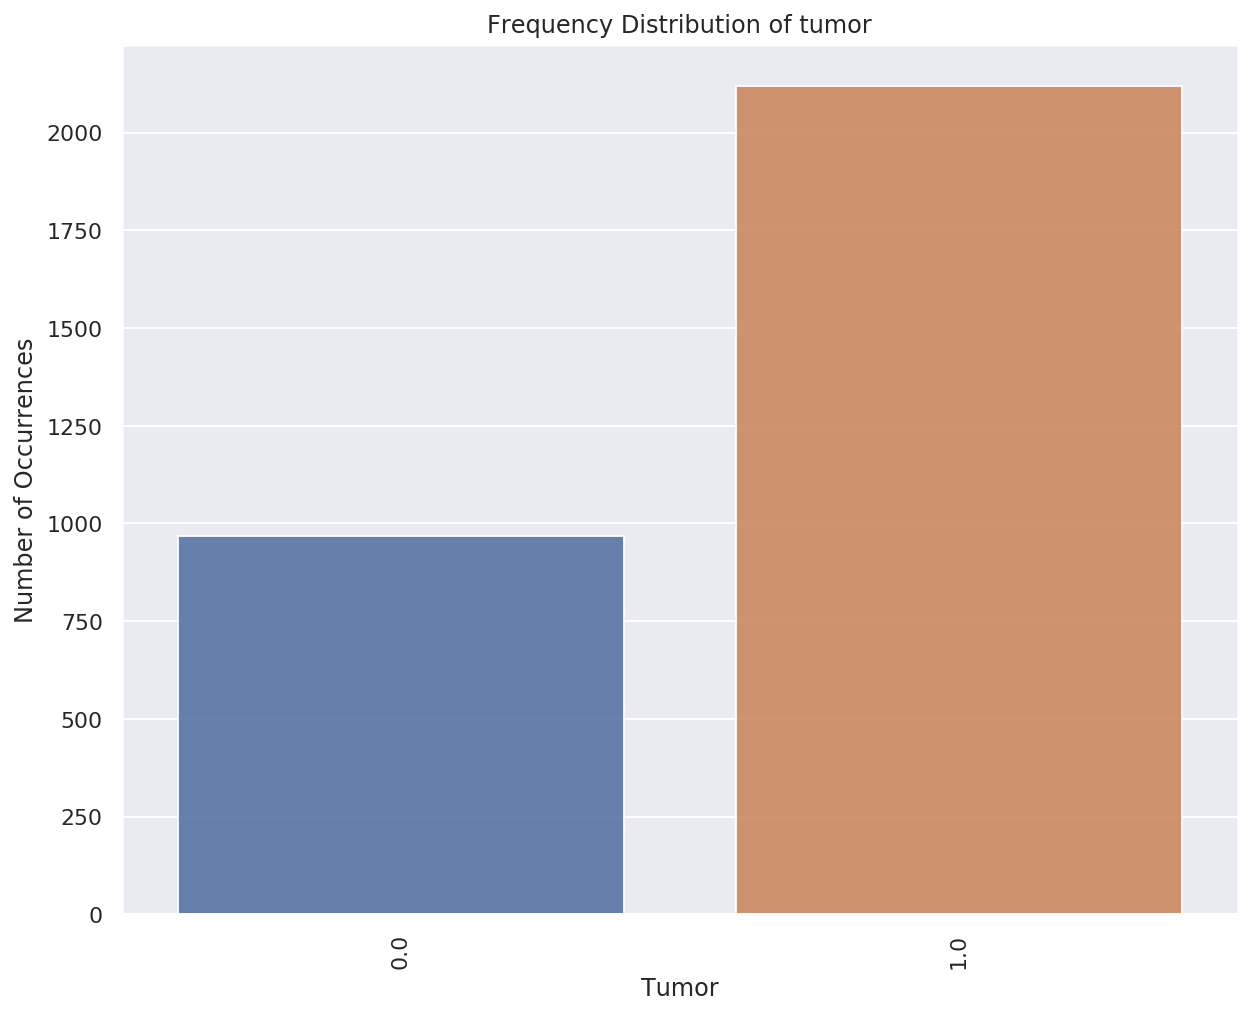

In [0]:
# Frequency distribution of tumor column

tumor_count = hyp_df['sex'].value_counts()
print(tumor_count)
sns.set(style="darkgrid")
sns.barplot(tumor_count.index,tumor_count.values, alpha=0.9)
plt.title('Frequency Distribution of tumor')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Tumor', fontsize=12)
plt.xticks(rotation=90)
plt.show()

> Most patients confirmed to have tumors in the test survey conducted by the hospital.


1.000    2119
0.000     967
Name: sex, dtype: int64


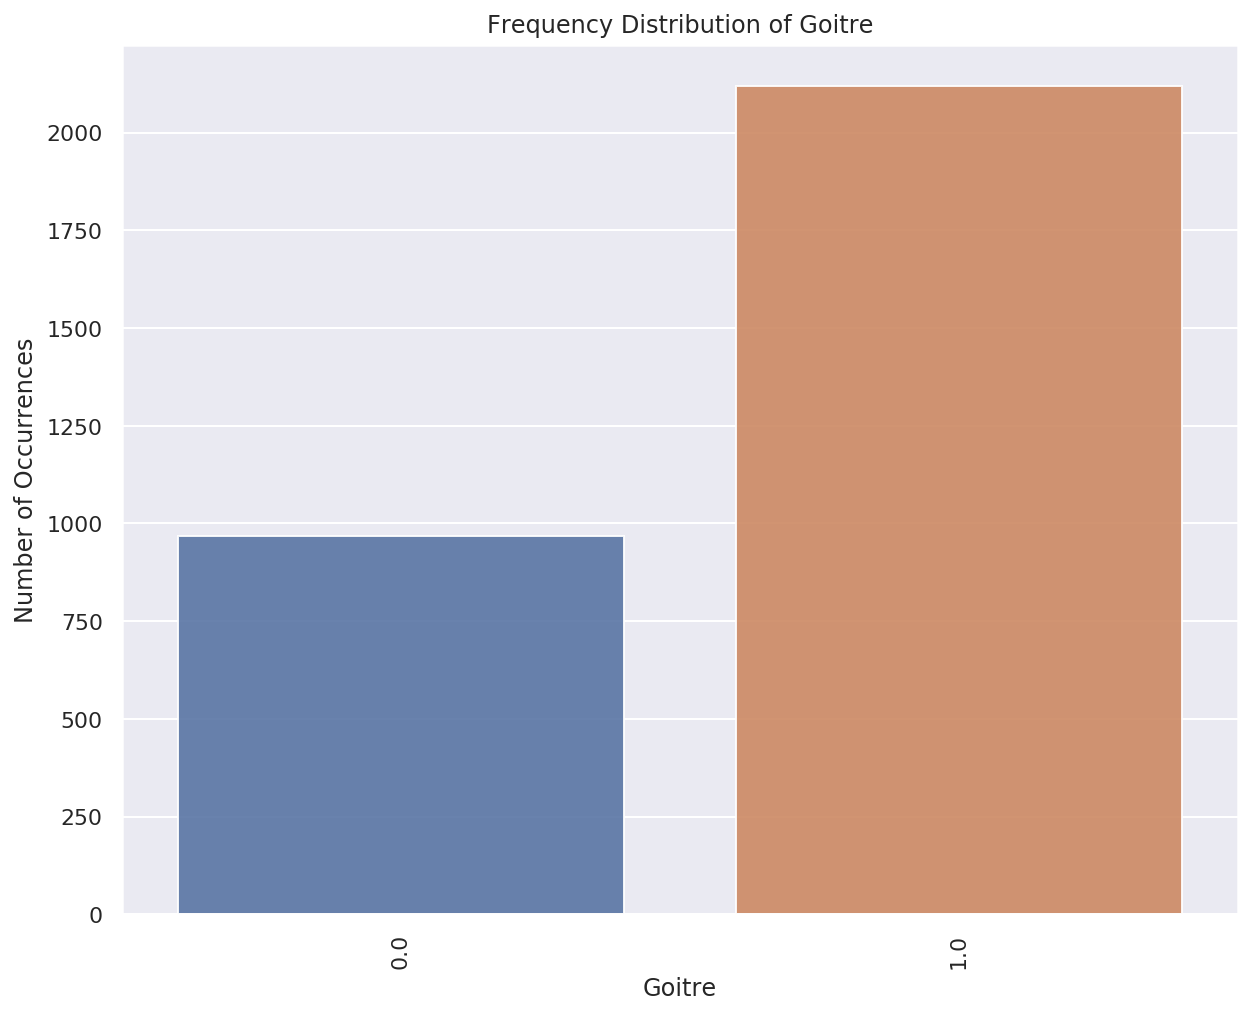

In [0]:
# Frequency distribution of goitre column
# 
goitre_count = hyp_df['sex'].value_counts()
print(sex_count)
sns.set(style="darkgrid")
sns.barplot(goitre_count.index,goitre_count.values, alpha=0.9)
plt.title('Frequency Distribution of Goitre')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Goitre', fontsize=12)
plt.xticks(rotation=90)
plt.show()

> A goiter can occur in a gland that is producing too little hormone (hyporthyroidism)

> Most patients tested positive for the goitre test

## b) Bivariate Analysis

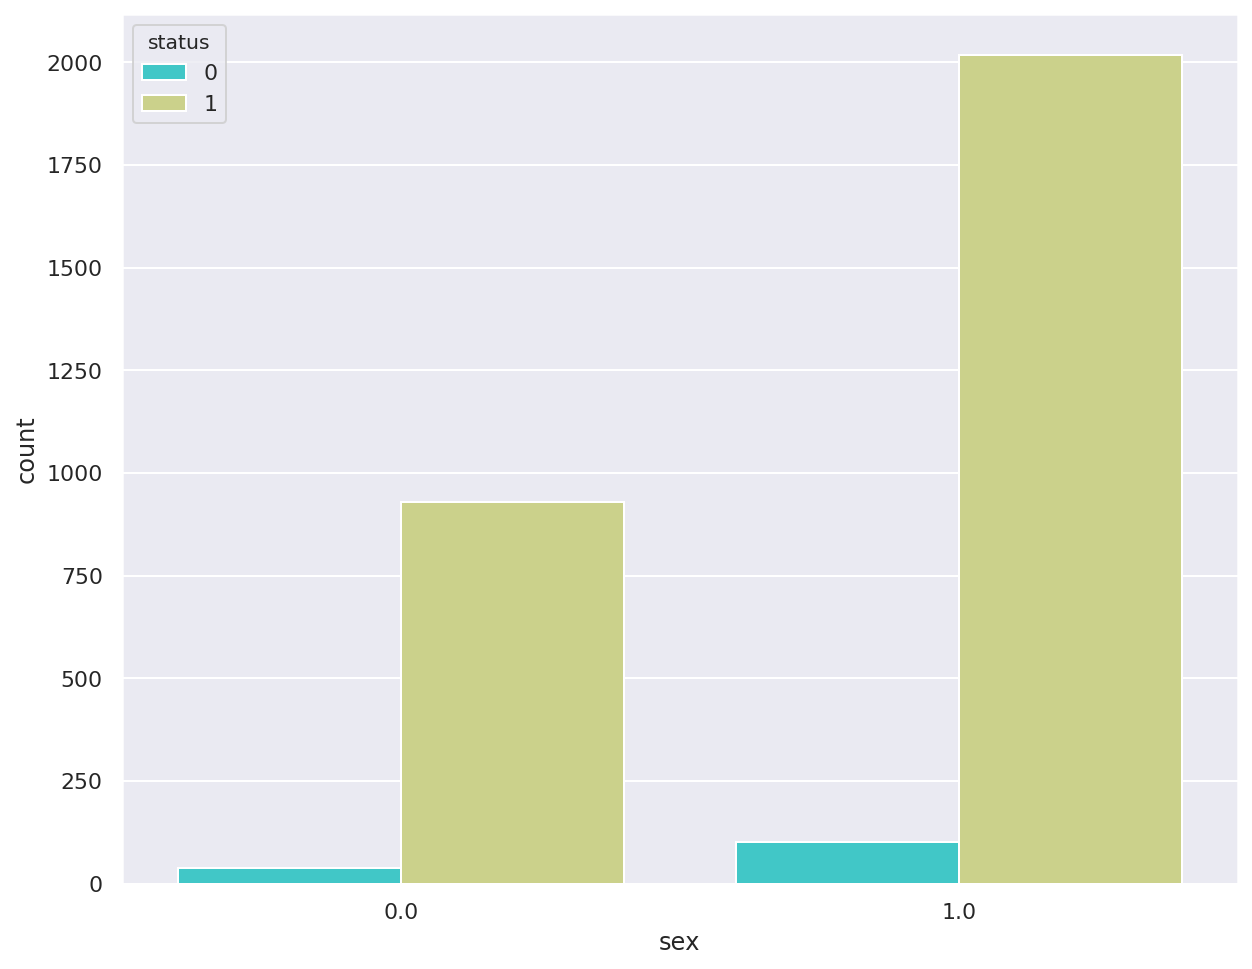

In [0]:
# comparing the status and sex columns to see who tested positive for the hypothyroid disease
# 
sns.set_style("darkgrid")
sns.countplot(x='sex',hue='status',data=hyp_df,palette='rainbow')

> It is clearly shown that most Male patients tested negative to the disease compared to female patients.

> Its is also shown that more ladies tested positive for the disease compared to the male patients.

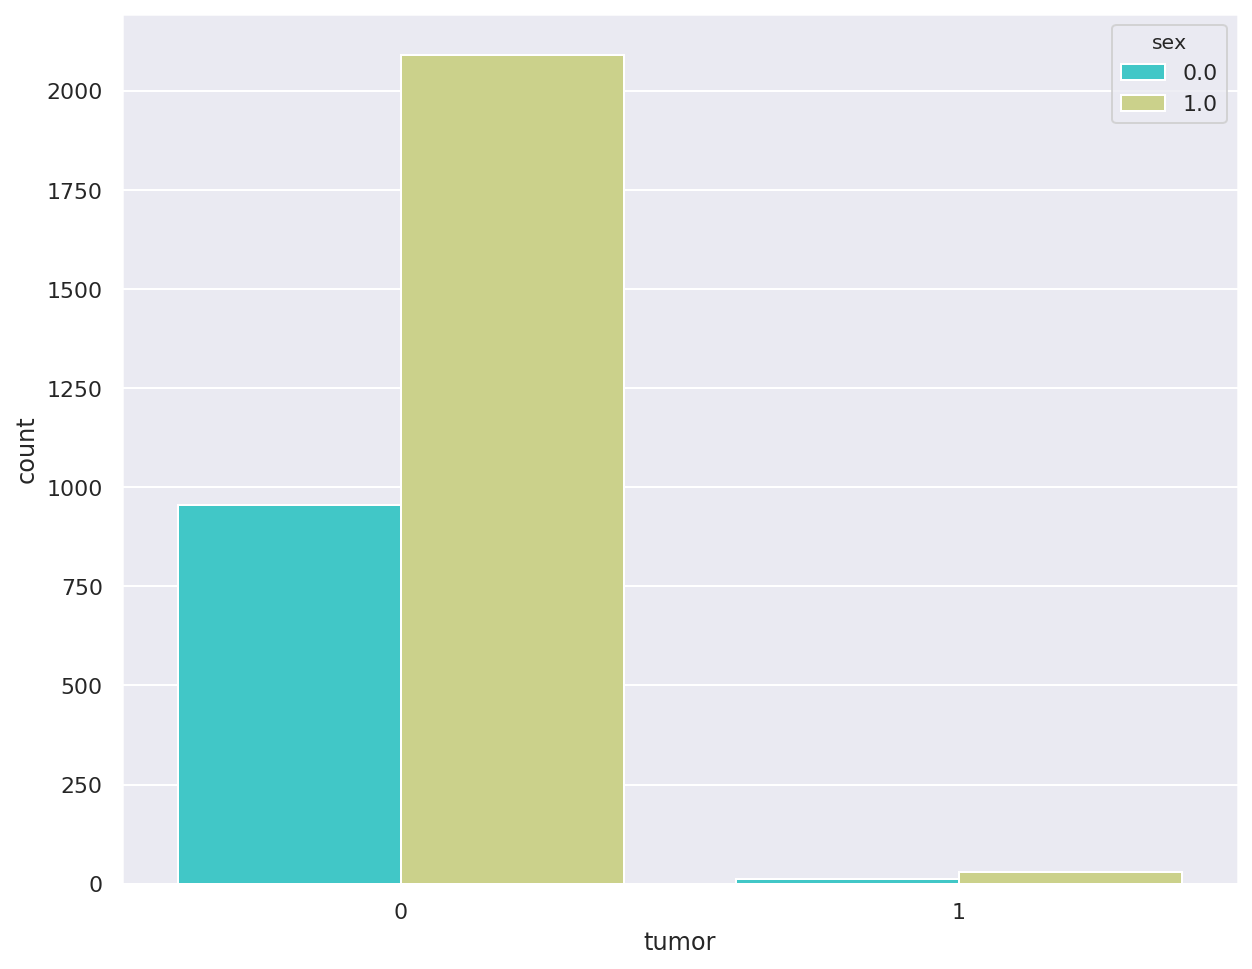

In [0]:
# comparing the tumor and sex columns to see who tested positive for the tumors
# 
sns.set_style("darkgrid")
sns.countplot(x='tumor',hue='sex',data=hyp_df,palette='rainbow')

> Most male patients had tumors compared to female patients

## 7. Implementing the Solution

> Includes creating different models to be able to solve the solution. 

> It also entails comparison of the different models in place to see the model that performs best.

## a) Baseline Model

> Building a logistic regression model.

>>  Logistic regression is a model used in statistics to estimate (guess) the probability of an event occurring having been given some previous data. 
It is appropriate when the target variable is binary ( For our case**(status)**  where it's either a patient tested positive for the hypothyroid disease or not)

> That made the basis of me choosing it as the baseline model.

In [172]:
#  Splitting the dataset to Train and test to build te model
# x is the independent variable
# y is the target variable(price)
X = hyp_df.drop(columns = ['status'], axis=1)
y = hyp_df['status']
# 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=30)
# 
# Standardising the X_train and the X_test to the same scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# Fitting the model
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
# 
# Making predictions using the model above
# 
predictions = logmodel.predict(X_test)
# 
# Getting the accuracy of our model
print("Accuracy is", accuracy_score(y_test,predictions))


Accuracy is 0.982200647249191


> An accuracy of 98% is an indication that our model is doing well

## b) Decision Trees

 **Random Forest**

>  Random forest is a classification algorithm consisting of many decisions trees. It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree.

In [0]:
# Split the independent and dependent variables
# We want to predict if someone tests positive for the hypothyroid disease, so let's use that column as our Y 
# X = hyp_df.drop['status'].values
y = hyp_df['status'].values

test_features = ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG']
X = hyp_df[test_features].values
# 
# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Import the model
from sklearn.ensemble import RandomForestRegressor

# The random_state variable is here to guarantee that we all see the same numbers.

forest = RandomForestRegressor()
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)
# Getting the scores assess our model
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.013818770226537215
Mean Squared Error: 0.006310032362459547
Root Mean Squared Error: 0.07943571213540888


> RMSE shows how much the predictions you make differ from the predicted data

> An RMSE of 0.08 is low which shows that it is a good model

**Applying parameters to compare with above model**

In [0]:
# hyperparameter tuning using random classifier
# 
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier

params = {'n_estimators': [10,20,30,50,100], 'max_depth':[1,2,3,4,5]}

kfold = KFold(n_splits=10, shuffle=True)
RFC = RandomForestClassifier()

search = GridSearchCV(RFC , param_grid=params, scoring='accuracy', cv=kfold)

search.fit(X,y)
search.best_params_

{'max_depth': 5, 'n_estimators': 10}

In [124]:
forest = RandomForestRegressor(max_depth=5, n_estimators=10)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred_RF = forest.predict(X_test)
# Getting the scores assess our model
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_RF))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_RF))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_RF)))
# 
from sklearn.metrics import r2_score

print("R2 score is ",round(r2_score(y_test, y_pred_RF),2))

Mean Absolute Error: 0.012918329101768369
Mean Squared Error: 0.006447226016621093
Root Mean Squared Error: 0.08029462009761983
R2 score is  0.83


 **Checking for feature importance**

In [106]:
# Get numerical feature importances
from sklearn.tree import export_graphviz
tree = forest.estimators_[50]
importances = list(tree.feature_importances_)

# We now use some Python magic to connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('age', 0.03), ('sex', 0.0), ('on_thyroxine', 0.01), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.0), ('thyroid_surgery', 0.01), ('query_hypothyroid', 0.03), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.0), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.01), ('TSH_measured', 0.0), ('TSH', 0.15), ('T3_measured', 0.0), ('T3', 0.02), ('TT4_measured', 0.0), ('TT4', 0.02), ('T4U_measured', 0.0), ('T4U', 0.01), ('FTI_measured', 0.0), ('FTI', 0.71), ('TBG_measured', 0.0), ('TBG', 0.0)]

Variable: FTI                  Importance: 0.71
Variable: TSH                  Importance: 0.15
Variable: age                  Importance: 0.03
Variable: query_hypothyroid    Importance: 0.03
Variable: T3                   Importance: 0.02
Variable: TT4                  Importance: 0.02
Variable: on_thyroxine         Importance: 0.01
Variable: thyroid_surgery      Importance: 0.01
Variable: goitre               Importance: 0.01
Variable: T4U                  Importance: 0.01
Vari

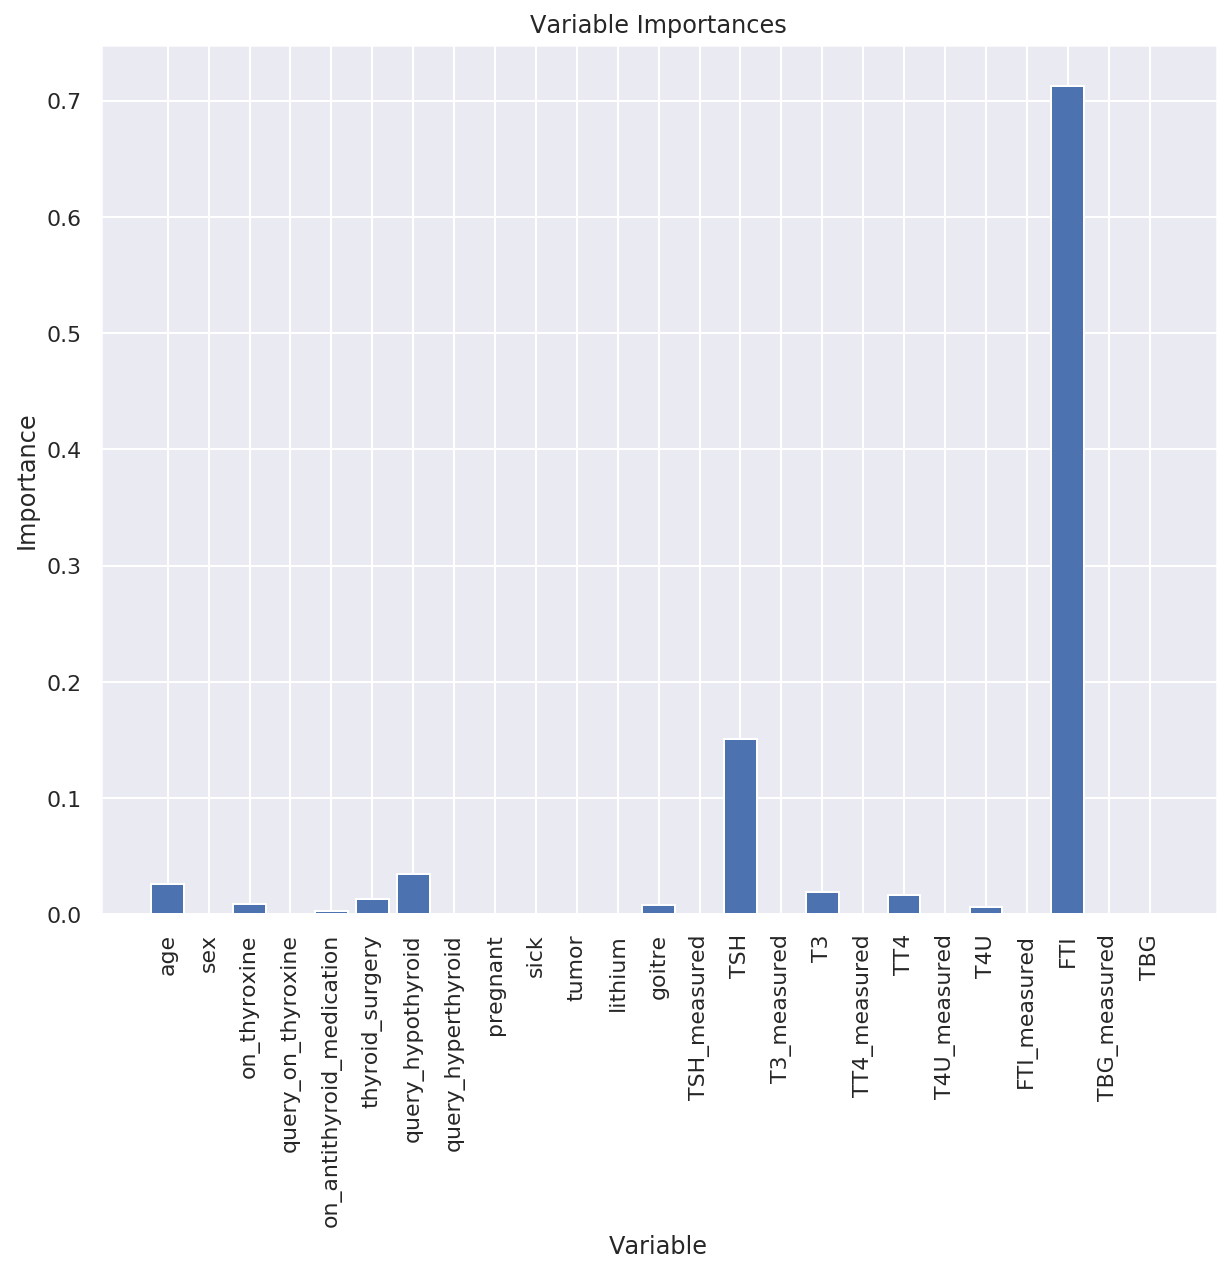

In [110]:
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, test_features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

> The most important features are FTI,TSH,query_hyperthyroid,Age,T3,TT4 in that order.

>> This means that these are the features which should be used while doing predictions

**Doing GradientBoosting**

In [0]:
from sklearn.ensemble import GradientBoostingRegressor
target_number_of_trees = 200

gbr = GradientBoostingRegressor(n_estimators=target_number_of_trees, learning_rate=0.7, max_depth=2)
gbr = gbr.fit(X_train, y_train)

y_pred_gbr = gbr.predict(X_test)


In [121]:
# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_gbr))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_gbr))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_gbr)))

from sklearn.metrics import r2_score

print("R2 score is ",round(r2_score(y_test, y_pred_gbr),2))

Mean Absolute Error: 0.028239904132216012
Mean Squared Error: 0.011414623925772966
Root Mean Squared Error: 0.1068392433788866
R2 score is  0.71


## c) Support Vector Machine

**Applying Polynomial kernel**

In [164]:
# Selecting the independent variables and the target variable
#
X = hyp_df[['FTI', 'TSH']].values
y = hyp_df['status'].values
# 
# splitting the data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=20)

# creating a model
poly = SVC(kernel='poly')
# fitting the model
poly.fit(X_train,y_train)
# 
# `getting the model 
print("Polynomial score is",poly.score(X_test, y_test))

Polynomial score is 0.9838012958963283


**Applying Linear kernel**

In [162]:
# Selecting the independent variables and the target variable
#
X = hyp_df[['FTI', 'TSH']].values
y = hyp_df['status'].values
# 
# splitting the data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=20)

# creating a model
linear = SVC(kernel = 'linear')
# fitting the model
linear.fit(X_train,y_train)
# 
# `getting the model 
print("Linear score is",linear.score(X_test, y_test))

Linear score is 0.9870410367170627


**Applying the rbf Kernel**

In [166]:
# Selecting the independent variables and the target variable
#
X = hyp_df[['FTI', 'TSH']].values
y = hyp_df['status'].values
# 
# splitting the data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=20)

# creating a model
rbf = SVC(kernel ='rbf')
# fitting the model
rbf.fit(X_train,y_train)
# 
# `getting the model 
print("rbf score is",rbf.score(X_test, y_test))

rbf score is 0.990280777537797


**Comparing the 3 kernel models**

In [171]:
# Comparing the different types of kernels to be able to judge on the best kernel
# 
print("Polynomial score is",poly.score(X_test, y_test))
print("Linear score is",linear.score(X_test, y_test))
print("rbf score is",rbf.score(X_test, y_test))

Polynomial score is 0.9838012958963283
Linear score is 0.9870410367170627
rbf score is 0.990280777537797


> rbf proves to be the best kernel since it has a bigger score compared to rest of the models

## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [182]:
# using the rbf kernel to create another model with the most important features
# 
# Selecting the independent variables and the target variable
#
X = hyp_df[['FTI', 'TSH', 'age', 'query_hypothyroid']].values
y = hyp_df['status'].values
# 
# splitting the data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=20)

# Changing the C value to 0.8 
# creating a model
Rbf = SVC(kernel ='rbf', C=0.8)

# fitting the model with adjusted C value
print(Rbf.fit(X_train,y_train))

# `getting the model score
print("Rbf score is",Rbf.score(X_test, y_test))


SVC(C=0.8, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Rbf score is 0.9892008639308856


> The model score has reduced from the original score of  0.99 which means that the hospital needs more data to be able to make good predictions about any new patients

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

> The provided data was right though not enough to answer the question

### b). Do we need other data to answer our question?

> Yes. More data is needed

### c). Did we have the right question?

> The question provided by the hospital was right to work with